The below plot shows all of the dominant colours in the image


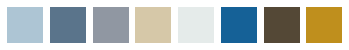

In [14]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


img = cv2.imread('landscape.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r, c = img.shape[:2]
new_r = 120
img = cv2.resize(img, (int(new_r * (float(c) / r)), new_r))
# print(img.shape)
pixels = img.reshape(-1, 3)
# print(pixels.shape)

km = KMeans(n_clusters=8)
km.fit(pixels)
colours = np.asarray(km.cluster_centers_, dtype='uint')
# print(colours)

# to calculate the number of points associated with a particular label
per = np.asarray(np.unique(km.labels_, return_counts=True)[1], dtype='float32')
per = per / pixels.shape[0]
# print(per)


for ix in range(colours.shape[0]):
    patch = np.ones((20, 20, 3))
    patch[:, :, :] = 255 - colours[ix]
    plt.subplot(1, 8, ix + 1)
    plt.axis('off')
    # Cast the image to np.uint8 after scaling [0, 255] range.
    plt.imshow((patch * 255).astype(np.uint8))

print("The below plot shows all of the dominant colours in the image")    


The below plot shows the Dominance of each colour in comaprison to other colours


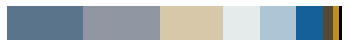

In [15]:

dom=[[per[ix],colours[ix]] for ix in range(colours.shape[0])]
Dom=sorted(dom, key =lambda z:z[0],reverse=True)

plt.figure(0)

patch= np.zeros((50,500,3))
start=0
for ix in range(km.n_clusters):
    width = int(Dom[ix][0] * patch.shape[1])
    end = start + width
    patch[:,start:end,:]=255-Dom[ix][1]
    start=end
plt.axis('off')
plt.imshow((patch * 255).astype(np.uint8))

print('The below plot shows the Dominance of each colour in comaprison to other colours')